<a href="https://colab.research.google.com/github/kocelifk/Ensemble-Learning/blob/main/Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = pd.DataFrame({'LikesExercising':[False,False,False,True,False,True,True,True,True],
                 'GotoGym':[True,True,True,True,True,False,True,False,False],
                 'DrivesCar':[True,False,False,True,True,False,True,False,True]})
Y = pd.Series(name='Age', data=[14,15,16,26,36,50,69,72,74])

In [ ]:
X.head()

,LikesExercising,GotoGym,DrivesCar
0,False,True,True
1,False,True,False
2,False,True,False
3,True,True,True
4,False,True,True


In [ ]:
Y.head()

0    14
1    15
2    16
3    26
4    36
Name: Age, dtype: int64

Label Encoding

*Kategorik değişkenin sınıflarının her biri label'dır.
*Label'ların encode edilmesi demek yeniden kodlamak demektir.
*String ifade şeklini 0 1 ya da 0 1 2 3 4 5 şeklinde ifade edebilmeyi amaçlıyoruz.
*Kullanacak olduğumuz yöntemin anlayacağı dile çevirmiş olacağız.
*Örneğin elimizde eğitim ile ilgili bir değişken var. 
*Bu eğitim durumu değişkeninin sınıfları label encoding ile 0 1 2 3 4 5 şeklinde ifade edilmiş olsun.
*0 en düşük eğitim durumunu ifade eden sınıfa 5 ise en yüksek eğitim durumunu ifade eden sınıfa verilmiş olsun.
*Eğitim değişkeni ordinal ve sıralı bir değişkendir.
*Yani sınıflar arasında bir fark var.
*Bu sebeple label encoding kullanılmasında bir sıkıntı yoktur. One hot encoder'da kullanabilirdik. -get_dummies() fonksiyonundan faydalanarak-


*Diyelim ki elimizde futbol takımı isimleri sınıflarını tutan kategorik bir değişken var.
*Label encoderdan geçirdik diyelim.
*Neticesinde takımların değerleri 0 1 2 3 4 5 arasında değişecek.
*Bu durumda label encoder kullanılması mantıklı değildir, çünkü kullanılacak modelleme
*yöntemi, bu sayısal değerleri büyüklük olarak algılayacak.
*Takımlar arasında bir fark olmadığı için bu nominal değişkeni label encoderdan geçirmek sakıncalı olacaktır.
*Kullanılacak olan algoritma ve yönteme göre farklılık gösteriyor olsa da buradaki büyüklük küçüklük durumu normalde olmadığı halde ilk takımın değeri küçük son takımın değeri büyükmüş gibi olmaktadır. 


*Peki daha doğru nasıl dönüştürebiliriz?
*Burada yapılması gereken işlem one hot encoder'dan geçirmektir. 
*One hot encoding buradaki her bir sınıfı sütun olarak değişkene dönüştürecektir.

In [ ]:
LE=LabelEncoder()
LE

LabelEncoder()

fit_transform(); iki basamaklı bir işlem.
Birinci basamakta ilgili dönüştürme işlemi yapılır, transform ile de eski değerlerin üzerine
yeni değerler yazılır.
Bu dönüştürme işlemi alfabetik sıraya göre yapılıyor.
İlk gördüğü değere 0 değerini veriyor.

In [ ]:
X['LikesExercising'] = LE.fit_transform(X['LikesExercising'])
X['LikesExercising'].head()

0    0
1    0
2    0
3    1
4    0
Name: LikesExercising, dtype: int64

In [ ]:
X['GotoGym'] = LE.fit_transform(X['GotoGym'])
X['GotoGym'].head()

0    1
1    1
2    1
3    1
4    1
Name: GotoGym, dtype: int64

In [ ]:
X['DrivesCar'] = LE.fit_transform(X['DrivesCar'])
X['DrivesCar'].head()

0    1
1    0
2    0
3    1
4    1
Name: DrivesCar, dtype: int64

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html      

sklearn kütüphanesinin dokümantasyonuna göre n_estimators'ın default değeri 100'dür.

n_estimators; gerçekleştirilecek boosting aşamalarının sayısıdır.

Gradyan boosting; overfittinge karşı dayanıklıdır. Bu nedenle n_estimators'ın yüksek değer alması genellikle daha iyi performans sağlar.


In [ ]:
#Modeli eğitmek ve aynı input değerlerinin yaşını tahmin etmek için GradientBoostingRegressor'ı
#n_estimators değerini 2'ye eşitleyerek kullanalım.

GB = GradientBoostingRegressor(n_estimators=2)
GB.fit(X,Y)
Y_predict = GB.predict(X)
Y_predict

#Tahminin ne kadar başarılı olduğunu öğrenmek için MSE'yi hesaplayalım

array([38.23 , 36.425, 36.425, 42.505, 38.23 , 45.07 , 42.505, 45.07 ,
       47.54 ])

In [ ]:
MSE_2 = (sum((Y-Y_predict)**2))/len(Y)
print("MSE for two estimators :", MSE_2) #Model performansını değerlendirirken n_estimators'ın 2 değerini alması

MSE for two estimators : 432.48205555555546


In [ ]:
GB = GradientBoostingRegressor(n_estimators=3)
GB.fit(X,Y)
Y_predict = GB.predict(X)
Y_predict

array([36.907 , 34.3325, 34.3325, 43.0045, 36.907 , 46.663 , 43.0045,
       46.663 , 50.186 ])

In [ ]:
MSE_3 = (sum((Y-Y_predict)**2))/len(Y)
print("MSE for three estimators :", MSE_3) #Model performansını değerlendirirken n_estimators'ın 3 değerini alması

MSE for three estimators : 380.05602055555556


In [ ]:
GB = GradientBoostingRegressor(n_estimators=50)
GB.fit(X,Y)
Y_predict = GB.predict(X)
Y_predict

array([25.08417833, 15.63313919, 15.63313919, 47.46821839, 25.08417833,
       60.89864242, 47.46821839, 60.89864242, 73.83164334])

In [ ]:
MSE_50 = (sum(Y-Y_predict))/len(Y)
print("MSE for fifty estimators :", MSE_50) #Model performansını değerlendirirken n_estimators'ın 50 değerini alması

MSE for fifty estimators : 3.947459643111668e-15


# **AdaBoost**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

In [ ]:
df = sns.load_dataset('titanic')

In [ ]:
df.shape

(891, 15)

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.dropna(inplace=True)

In [ ]:
df["pclass"].unique()

array([1, 3, 2])

In [ ]:
df["pclass"].value_counts()

1    157
2     15
3     10
Name: pclass, dtype: int64

In [ ]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df["sex"].value_counts()

male      94
female    88
Name: sex, dtype: int64

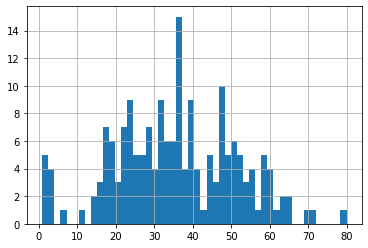

In [ ]:
df["age"].hist(bins=50)

# **Data Pre-processing**

In [ ]:
subset = df[["pclass", "sex", "age", "survived"]].copy()
subset.dropna(inplace=True)
X=df[["pclass", "sex", "age"]].copy()

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [ ]:
X['sex'].head()

1     0
3     0
6     1
10    0
11    0
Name: sex, dtype: int64

In [ ]:
X['sex'] = lb.fit_transform(X['sex'])
X['sex'].head()

1     0
3     0
6     1
10    0
11    0
Name: sex, dtype: int64

In [ ]:
X.head()

,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [ ]:
X.shape

(182, 3)

In [ ]:
X.describe()

,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [ ]:
y=subset["survived"]

In [ ]:
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
        lb = preprocessing.LabelBinarizer()
        lb.fit(y_train)
        if train:
          '''
          training performance
          '''
          res = clf.predict(X_train)
          print("Train Result:\n")
          print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
          print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
          print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,  res)))
          print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
          res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
          print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
          print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))        

        elif train:
          '''
          training performance
          '''
          res = clf.predict(X_train)
          print("Train Result:\n")
          print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, res)))
          print("Classification Report: \n {}\n".format(classification_report(y_train, res)))
          print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train,  res)))
          print("ROC AUC: {0:.4f}\n".format(roc_auc_score(lb.transform(y_train), lb.transform(res))))
          res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
          print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
          print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))      

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf = AdaBoostClassifier(n_estimators = 100, random_state = 42)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train = True)
print("\n**************************************************\n")
print_score(ada_clf, X_train, X_test, y_train, y_test, train = False)

Train Result:

accuracy score: 0.9055

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.92      0.94      0.93        85

    accuracy                           0.91       127
   macro avg       0.90      0.89      0.89       127
weighted avg       0.90      0.91      0.90       127


Confusion Matrix: 
 [[35  7]
 [ 5 80]]

ROC AUC: 0.8873

Average Accuracy: 	 0.6865
Accuracy SD: 		 0.1184

**************************************************



# **AdaBoost with Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ada_clf=AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)

In [ ]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [ ]:
print_score(ada_clf, X_train, X_test, y_train, y_test, train=True)
print("\n*****************************************************\n")
print_score(ada_clf, X_train, X_test, y_train, y_test, train = False)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.95      0.96        85

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[39  3]
 [ 4 81]]

ROC AUC: 0.9408

Average Accuracy: 	 0.7487
Accuracy SD: 		 0.0762

*****************************************************



Confusion Matrix'i yorumladığımızda;

True Positive --> 39 -->yapılan doğru tahmin
False Positive --> 3 -->

False Negative --> 4
True Negative --> 81


[[TP  FP]
 [ FN TN]]



# **Gradient Boosting / Gradient Boosting Machine**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc_clf=GradientBoostingClassifier()

In [ ]:
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
print_score(gbc_clf, X_train, X_test, y_train, y_test, train= True)
print("\n***********************************************************\n")
print_score(gbc_clf, X_train, X_test, y_train, y_test, train = False)

Train Result:

accuracy score: 0.9449

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.95      0.96        85

    accuracy                           0.94       127
   macro avg       0.94      0.94      0.94       127
weighted avg       0.95      0.94      0.95       127


Confusion Matrix: 
 [[39  3]
 [ 4 81]]

ROC AUC: 0.9408

Average Accuracy: 	 0.7410
Accuracy SD: 		 0.0916

***********************************************************

